In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow import keras
keras.backend.clear_session()
tf.compat.v1.reset_default_graph()
del vrnn
del model
tf.random.set_seed(24)

NameError: name 'vrnn' is not defined

In [3]:
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np

arparams = np.array([1.0])
maparams = np.array([1.0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]
arma_process = ArmaProcess(ar, ma)
sample = arma_process.generate_sample(nsample=1000)



In [299]:
import pickle as pkl

with open('AR1M1_run3/training_data.pkl', 'wb') as f:
    pkl.dump(sample,f)

In [4]:
import pickle as pkl
with open('AR1M1_run2/training_data.pkl', 'rb') as f:
    sample = pkl.load(f)

In [5]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
m_sample = mm.fit_transform(np.reshape(sample, (-1,1)))
m_sample = np.ndarray.flatten(m_sample)

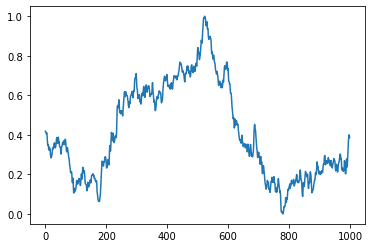

In [6]:
plt.plot(m_sample)

In [7]:
window = 100
train = np.asarray([m_sample[i:i+window] for i in range(len(sample) - window + 1)])[:,:,np.newaxis]

In [8]:
from vrnngan2 import VRNNGRU
import os
from tensorflow import keras
keras.backend.clear_session()
timesteps = train.shape[1]
feature_space = train.shape[2]
z_dim = 32
hidden_dim = 64
vrnn = VRNNGRU(feature_space, z_dim, hidden_dim, timesteps)
vrnn.load_weights('AR1M1_run4/generator')
# vrnn.compile(keras.optimizers.Adam(lr=0.001))
# vrnn.fit(train, train, batch_size= 20, epochs=10)

In [765]:
from importlib import reload
import vrnngan2
vrnngan2 = reload(vrnngan2)

In [766]:
from vrnngan2 import VRNNGRUGAN, VRNNWGAN, lagCallback
from tensorflow import keras
import os

timesteps = train.shape[1]
feature_space = train.shape[2]
z_dim = 32
hidden_dim = 64
model = VRNNGRUGAN(feature_space, z_dim, hidden_dim, timesteps, 2.0, vrnn)
# model.load_weights('AR1M1_run3/gan')
model.compile(keras.optimizers.Adam(lr=0.0001), keras.optimizers.Adam(lr=0.0001))
model.fit(train, train, batch_size= 20, epochs=800)    
    

Epoch 1/800
46/46 [==============================] - 119s 134ms/step - total_loss: -86.0705 - loss: -88.9642 - kl: 0.0185 - discrim_loss: 2.0305 - discrim_loss_fake: 0.6493 - discrim_loss_real: 0.7396
Epoch 2/800
46/46 [==============================] - 6s 129ms/step - total_loss: -85.5547 - loss: -90.7334 - kl: 0.0011 - discrim_loss: 2.0015 - discrim_loss_fake: 0.6135 - discrim_loss_real: 0.7787
Epoch 3/800
46/46 [==============================] - 6s 125ms/step - total_loss: -85.5913 - loss: -87.6897 - kl: 8.9562e-04 - discrim_loss: 1.9735 - discrim_loss_fake: 0.5829 - discrim_loss_real: 0.8141
Epoch 4/800
46/46 [==============================] - 6s 129ms/step - total_loss: -85.6427 - loss: -86.7331 - kl: 7.8940e-04 - discrim_loss: 1.9521 - discrim_loss_fake: 0.5534 - discrim_loss_real: 0.8521
Epoch 5/800
46/46 [==============================] - 6s 126ms/step - total_loss: -85.2572 - loss: -89.3232 - kl: 6.9561e-04 - discrim_loss: 1.9375 - discrim_loss_fake: 0.5252 - discrim_loss_real

46/46 [==============================] - 6s 127ms/step - total_loss: -77.2964 - loss: -88.5072 - kl: 0.0018 - discrim_loss: 0.9197 - discrim_loss_fake: 0.3083 - discrim_loss_real: 0.3039
Epoch 82/800
46/46 [==============================] - 6s 127ms/step - total_loss: -76.4220 - loss: -88.0922 - kl: 0.0017 - discrim_loss: 0.9168 - discrim_loss_fake: 0.3072 - discrim_loss_real: 0.3022
Epoch 83/800
46/46 [==============================] - 6s 127ms/step - total_loss: -75.9643 - loss: -87.9993 - kl: 0.0020 - discrim_loss: 0.9139 - discrim_loss_fake: 0.3084 - discrim_loss_real: 0.3002
Epoch 84/800
46/46 [==============================] - 6s 129ms/step - total_loss: -76.6579 - loss: -88.0672 - kl: 0.0039 - discrim_loss: 0.9095 - discrim_loss_fake: 0.3057 - discrim_loss_real: 0.2987
Epoch 85/800
46/46 [==============================] - 6s 127ms/step - total_loss: -76.1529 - loss: -88.9416 - kl: 0.0039 - discrim_loss: 0.9038 - discrim_loss_fake: 0.3042 - discrim_loss_real: 0.2962
Epoch 86/800


46/46 [==============================] - 6s 129ms/step - total_loss: -122.4738 - loss: -134.8282 - kl: 0.1606 - discrim_loss: 0.8428 - discrim_loss_fake: 0.2622 - discrim_loss_real: 0.2795
Epoch 162/800
46/46 [==============================] - 6s 128ms/step - total_loss: -124.5472 - loss: -134.1654 - kl: 0.1627 - discrim_loss: 0.8509 - discrim_loss_fake: 0.2611 - discrim_loss_real: 0.2797
Epoch 163/800
46/46 [==============================] - 6s 127ms/step - total_loss: -127.5839 - loss: -137.2504 - kl: 0.1820 - discrim_loss: 0.8518 - discrim_loss_fake: 0.2611 - discrim_loss_real: 0.2837
Epoch 164/800
46/46 [==============================] - 6s 128ms/step - total_loss: -127.8478 - loss: -136.7330 - kl: 0.1505 - discrim_loss: 0.8532 - discrim_loss_fake: 0.2604 - discrim_loss_real: 0.2781
Epoch 165/800
46/46 [==============================] - 6s 126ms/step - total_loss: -129.8043 - loss: -140.4213 - kl: 0.1684 - discrim_loss: 0.8521 - discrim_loss_fake: 0.2592 - discrim_loss_real: 0.2864

46/46 [==============================] - 6s 128ms/step - total_loss: -185.1882 - loss: -193.7392 - kl: 0.1842 - discrim_loss: 0.8846 - discrim_loss_fake: 0.2378 - discrim_loss_real: 0.3067
Epoch 242/800
46/46 [==============================] - 6s 129ms/step - total_loss: -182.3909 - loss: -193.5619 - kl: 0.1995 - discrim_loss: 0.8765 - discrim_loss_fake: 0.2360 - discrim_loss_real: 0.3121
Epoch 243/800
46/46 [==============================] - 6s 128ms/step - total_loss: -185.7636 - loss: -195.1911 - kl: 0.1735 - discrim_loss: 0.8951 - discrim_loss_fake: 0.2371 - discrim_loss_real: 0.3116
Epoch 244/800
46/46 [==============================] - 6s 128ms/step - total_loss: -173.6684 - loss: -177.7001 - kl: 0.3028 - discrim_loss: 0.8730 - discrim_loss_fake: 0.2360 - discrim_loss_real: 0.3078
Epoch 245/800
46/46 [==============================] - 6s 129ms/step - total_loss: -184.6348 - loss: -192.3873 - kl: 0.1916 - discrim_loss: 0.8779 - discrim_loss_fake: 0.2378 - discrim_loss_real: 0.3044

KeyboardInterrupt: 

In [769]:
model.fit(train, train, batch_size= 20, epochs=600)

Epoch 1/600
46/46 [==============================] - 6s 124ms/step - total_loss: -188.8548 - loss: -198.6217 - kl: 0.1807 - discrim_loss: 0.8718 - discrim_loss_fake: 0.2312 - discrim_loss_real: 0.3054
Epoch 2/600
46/46 [==============================] - 6s 122ms/step - total_loss: -190.8616 - loss: -199.2009 - kl: 0.1464 - discrim_loss: 0.8822 - discrim_loss_fake: 0.2324 - discrim_loss_real: 0.2991
Epoch 3/600
46/46 [==============================] - 6s 122ms/step - total_loss: -187.8452 - loss: -198.5685 - kl: 0.1626 - discrim_loss: 0.8751 - discrim_loss_fake: 0.2314 - discrim_loss_real: 0.3072
Epoch 4/600
46/46 [==============================] - 6s 122ms/step - total_loss: -188.6335 - loss: -199.8235 - kl: 0.1642 - discrim_loss: 0.8781 - discrim_loss_fake: 0.2318 - discrim_loss_real: 0.3117
Epoch 5/600
46/46 [==============================] - 6s 123ms/step - total_loss: -190.7657 - loss: -197.6445 - kl: 0.1728 - discrim_loss: 0.8829 - discrim_loss_fake: 0.2319 - discrim_loss_real: 0.

KeyboardInterrupt: 

In [718]:
vrnn.save_weights('AR1M1_run4/generator')

In [719]:
model.save_weights('AR1M1_run4/gan')

In [706]:
outputs, z, q_mu, p_mu, q_logvar, p_logvar, output_mean, output_logvar,_ = vrnn.predict(train)

(0.0, 1.0)

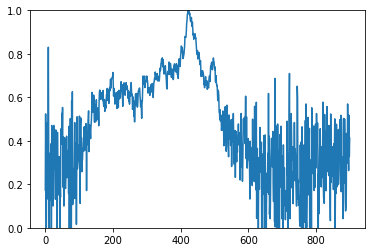

In [707]:
plt.plot(outputs[:,-1,:])
plt.ylim([0,1])

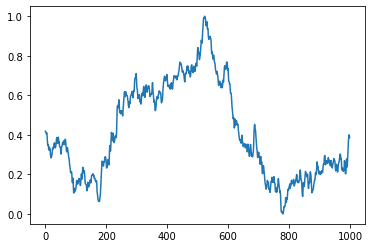

In [99]:
plt.plot(m_sample)

In [37]:
state = None
results = []
inp = np.reshape(train[:,0,:], (-1,1))

for i in range(1000):
    outputs, state = vrnn.vrnn_cell(inp, state, inference=False)
    state=[state]
    results.append(outputs[6].numpy())


In [38]:
results = np.stack(results, axis=1)

In [30]:
import pickle as pkl
with open('synthetic_data/arm11/arma11_vrnngan.pkl', 'wb') as f:
    pkl.dump(results,f)

(0.0, 1.0)

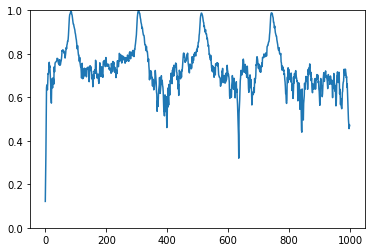

In [39]:
plt.plot(results[10])
plt.ylim([0,1])

In [29]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

arma_est = sm.tsa.ARIMA(results, order=(1,0,1), trend='n').fit()

ValueError: SARIMAX models require univariate `endog`. Got shape (901, 100).

In [ ]:
arma_est.params

In [467]:
with open('synthetic_data/arma11_vrnn.pkl', 'wb') as f:
    pkl.dump(temp,f)